In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# week 13-1 평가지표 실습

In [2]:
import sklearn.metrics

`-` `y`, `yhat`

In [3]:
y = np.array([1]*2 + [0]*98)
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [4]:
yhat = np.array([0,1,1,1]+[0]*96)
yhat

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

`-` 혼동행렬(confusion matrix) 만들기

In [5]:
sklearn.metrics.confusion_matrix(y,yhat)

array([[96,  2],
       [ 1,  1]])

In [6]:
(tn,fp),(fn,tp) = sklearn.metrics.confusion_matrix(y,yhat)

## accuracy
정답률

In [7]:
# accuracy
(tp+tn) / (tn+fp+fn+tp)

0.97

In [8]:
sklearn.metrics.accuracy_score(y,yhat)

0.97

## recall
실제 O를 O라고 예측한 비율

In [9]:
tp / (tp+fn)

0.5

In [10]:
sklearn.metrics.recall_score(y,yhat)

0.5

# precision
O라고 예측한 관측치중 진짜 O인 비율

In [11]:
tp / (tp+fp)

0.3333333333333333

In [12]:
sklearn.metrics.precision_score(y,yhat)

0.3333333333333333

## FPR
생사람 잡은 사람의 비율

In [13]:
fp / (fp+tn)

0.02040816326530612

# week13-2 아이스크림/자료분석(autogluon)

In [14]:
!pip install autogluon.eda

  Using cached scikit_learn-1.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)
  Using cached pyod-1.0.9-py3-none-any.whl
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/opt/conda/lib/python3.10/site-packages/jsonschema-4.19.0.dist-info/METADATA'



In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
#---#
import pickle
from autogluon.tabular import TabularPredictor
import autogluon.eda.auto as auto
#---#
import warnings
warnings.filterwarnings('ignore')

### Data

In [16]:
temp = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/temp.csv').iloc[:,3].to_numpy()[:100]
temp.sort()
np.random.seed(43052)
eps = np.random.randn(100)*3 # 오차
icecream_sales = 20 + temp * 2.5 + eps 
df_train = pd.DataFrame({'temp':temp,'sales':icecream_sales})

<AxesSubplot: xlabel='temp', ylabel='sales'>

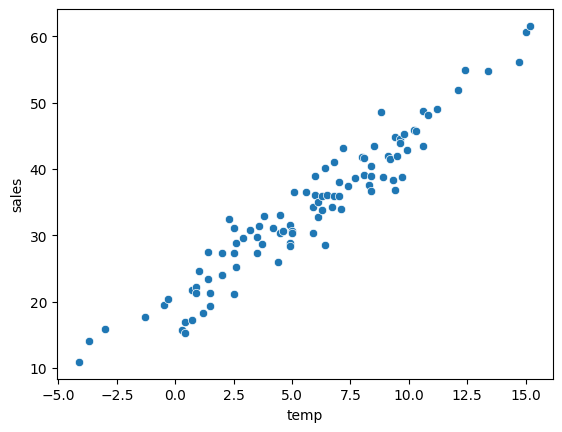

In [17]:
sns.scatterplot(df_train, x='temp',y='sales')

### 적합

In [18]:
# step1 --pass
# step2
predictr = TabularPredictor(label='sales')
# step3
predictr.fit(df_train)
# step4
yhat = predictr.predict(df_train)

No path specified. Models will be saved in: "AutogluonModels/ag-20231211_060135/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231211_060135/"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Dec 1 13:04:48 UTC 2023
Disk Space Avail:   20.93 GB / 20.96 GB (99.9%)
Train Data Rows:    100
Train Data Columns: 1
Label Column: sales
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (61.561043278721556, 10.90026146402572, 33.97342, 10.63375)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeat

[1000]	valid_set's rmse: 5.45375
[2000]	valid_set's rmse: 5.40245


	-5.3708	 = Validation score   (-root_mean_squared_error)
	0.25s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-4.4041	 = Validation score   (-root_mean_squared_error)
	0.77s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: CatBoost ...
	-3.8364	 = Validation score   (-root_mean_squared_error)
	0.52s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-4.2375	 = Validation score   (-root_mean_squared_error)
	0.82s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-3.6961	 = Validation score   (-root_mean_squared_error)
	2.44s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: XGBoost ...
		'Booster' object has no attribute 'best_ntree_limit'
Detailed Traceback:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 1733, in _train_and_save
    model = self._train_single(

### 적합결과 시각화

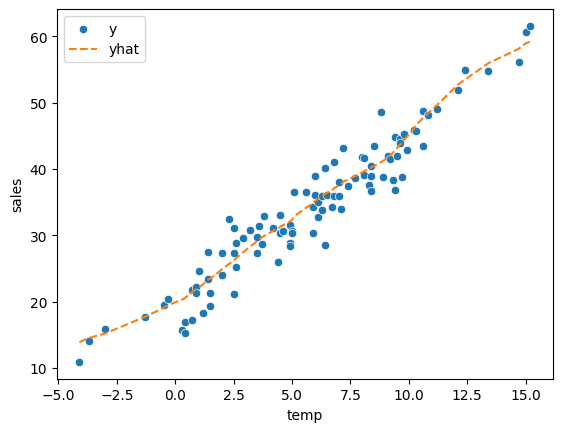

In [19]:
sns.scatterplot(df_train, x='temp',y='sales',label='y')
sns.lineplot(df_train, x='temp',y=yhat,color='C1',linestyle='--',label='yhat')
plt.legend()

### 모형비교

In [20]:
predictr.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-3.544487,0.007442,1.773007,0.000595,0.377383,2,True,11
1,NeuralNetTorch,-3.550809,0.005050,0.878158,0.005050,0.878158,1,True,9
2,NeuralNetFastAI,-3.696135,0.011493,2.442678,0.011493,2.442678,1,True,8
3,CatBoost,-3.836449,0.001798,0.517466,0.001798,0.517466,1,True,6
4,LightGBMLarge,-3.978956,0.001667,0.308509,0.001667,0.308509,1,True,10
5,KNeighborsUnif,-4.119208,0.011674,0.354973,0.011674,0.354973,1,True,1
6,ExtraTreesMSE,-4.237516,0.063003,0.815738,0.063003,0.815738,1,True,7
7,RandomForestMSE,-4.404096,0.068476,0.770322,0.068476,0.770322,1,True,5
8,KNeighborsDist,-4.653194,0.002375,0.006968,0.002375,0.006968,1,True,2
9,LightGBM,-5.370826,0.001588,0.250088,0.001588,0.250088,1,True,4


### r2-score 계산

In [21]:
# 방법1
_y = df_train.sales
_yhat = predictr.predict(df_train)
sklearn.metrics.r2_score(_y,_yhat)

0.929562179954558

In [22]:
# 방법2
_y = df_train.sales
_yhat = predictr.predict(df_train, model='WeightedEnsemble_L2')
sklearn.metrics.r2_score(_y,_yhat)

0.929562179954558

### 특정 모형의 적합값 확인

In [24]:
_y = df_train.sales
_yhat = predictr.predict(df_train, model='CatBoost')
sklearn.metrics.r2_score(_y,_yhat)

0.9415239367518365

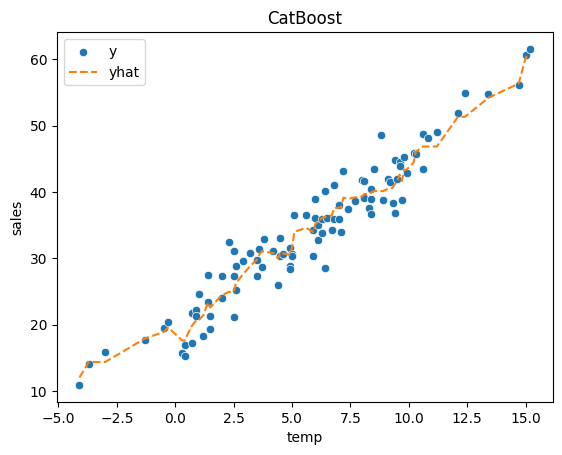

In [26]:
sns.scatterplot(df_train, x='temp', y='sales', label='y')
sns.lineplot(df_train, x='temp',y=_yhat,color='C1',linestyle='--',label='yhat')
ax = plt.gca()
ax.set_title("CatBoost")
plt.legend()

# week13-3 키와 몸무게(결측치, 성별교호작용)

### Data

In [27]:
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/height_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/height_test.csv')

In [28]:
df_train.head()

,weight,sex,height
0,71.169041,male,180.906857
1,69.204748,male,178.123281
2,49.037293,female,165.106085
3,74.472874,male,177.467439
4,74.239599,male,177.439925


- 성별간 교호작용 존재
- 결측치 존재(성별에 따라 나눠서 결측치를 처리해야 좋았음)

<AxesSubplot: xlabel='weight', ylabel='height'>

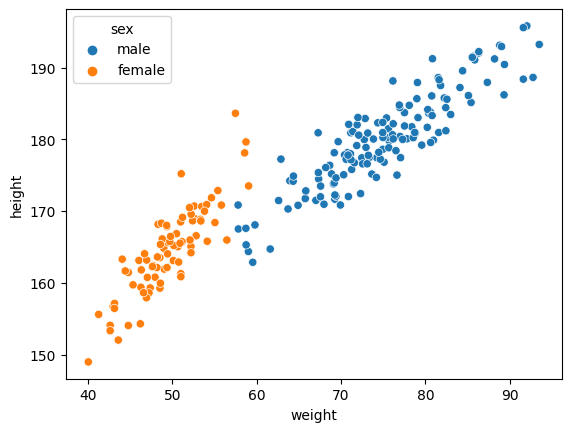

In [29]:
sns.scatterplot(df_train, x='weight',y='height',hue='sex')

### 적합

In [30]:
# step1 --pass
# step2
predictr = TabularPredictor(label='height')
# step3
predictr.fit(df_train)
# step4
yhat = predictr.predict(df_train)

No path specified. Models will be saved in: "AutogluonModels/ag-20231211_060252/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231211_060252/"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Dec 1 13:04:48 UTC 2023
Disk Space Avail:   20.93 GB / 20.96 GB (99.9%)
Train Data Rows:    280
Train Data Columns: 2
Label Column: height
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (195.79716947992372, 148.97529810482766, 174.60543, 9.4301)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFea

[1000]	valid_set's rmse: 3.05149


	-3.1331	 = Validation score   (-root_mean_squared_error)
	0.36s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-3.0811	 = Validation score   (-root_mean_squared_error)
	0.83s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: CatBoost ...
	-2.8341	 = Validation score   (-root_mean_squared_error)
	0.84s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-3.0481	 = Validation score   (-root_mean_squared_error)
	0.8s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-3.11	 = Validation score   (-root_mean_squared_error)
	2.4s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: XGBoost ...
		'Booster' object has no attribute 'best_ntree_limit'
Detailed Traceback:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 1733, in _train_and_save
    model = self._train_single(X, y

### 적합결과 시각화

<AxesSubplot: xlabel='weight', ylabel='height'>

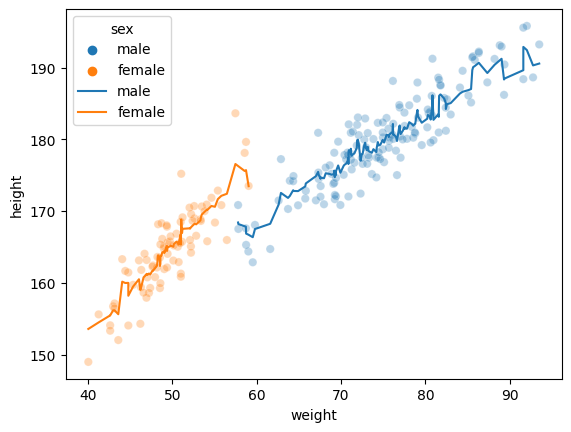

In [31]:
sns.scatterplot(df_train, x='weight',y='height',hue='sex',alpha=0.3)
sns.lineplot(df_train, x='weight',y=yhat,hue='sex')

In [32]:
predictr.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-2.735284,0.033122,5.170795,0.000653,0.365227,2,True,11
1,CatBoost,-2.834127,0.001918,0.840595,0.001918,0.840595,1,True,6
2,NeuralNetTorch,-2.883485,0.006828,1.537106,0.006828,1.537106,1,True,9
3,LightGBMXT,-3.034869,0.003622,0.526735,0.003622,0.526735,1,True,3
4,ExtraTreesMSE,-3.048093,0.070380,0.796145,0.070380,0.796145,1,True,7
5,RandomForestMSE,-3.081138,0.067877,0.829402,0.067877,0.829402,1,True,5
6,NeuralNetFastAI,-3.110003,0.014235,2.404247,0.014235,2.404247,1,True,8
7,LightGBM,-3.133082,0.002081,0.364877,0.002081,0.364877,1,True,4
8,LightGBMLarge,-3.175914,0.002314,0.512862,0.002314,0.512862,1,True,10
9,KNeighborsDist,-3.278581,0.004725,0.009234,0.004725,0.009234,1,True,2


### 결과해석 및 시각화

1. y의 분포, (X,y)의 관계 시각화

In [33]:
import autogluon.eda.auto as auto

### 변수해석

## Target variable analysis

,count,mean,std,min,25%,50%,75%,max,dtypes,unique,missing_count,missing_ratio,raw_type,special_types
height,280,174.605431,9.430102,148.975298,167.572671,175.186487,181.132612,195.797169,float64,280,,,float,


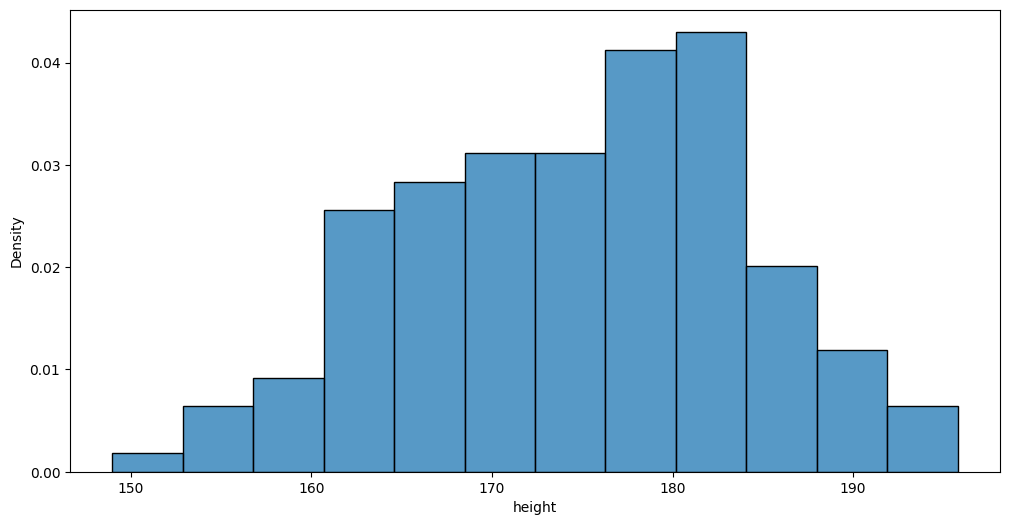

### Target variable correlations

**`train_data` - `spearman` correlation matrix; focus: absolute correlation for `height` >= `0.5`**

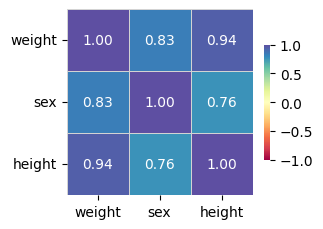

**Feature interaction between `weight`/`height` in `train_data`**

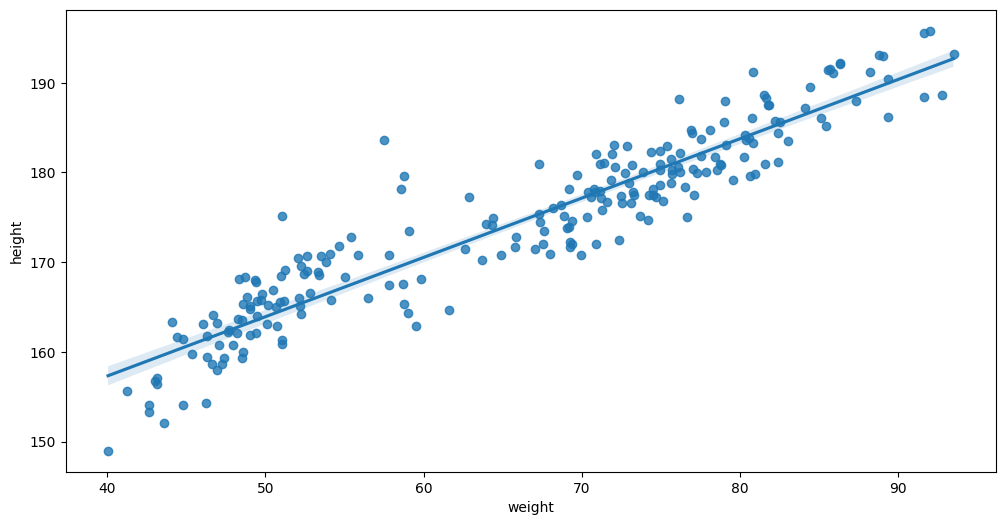

**Feature interaction between `sex`/`height` in `train_data`**

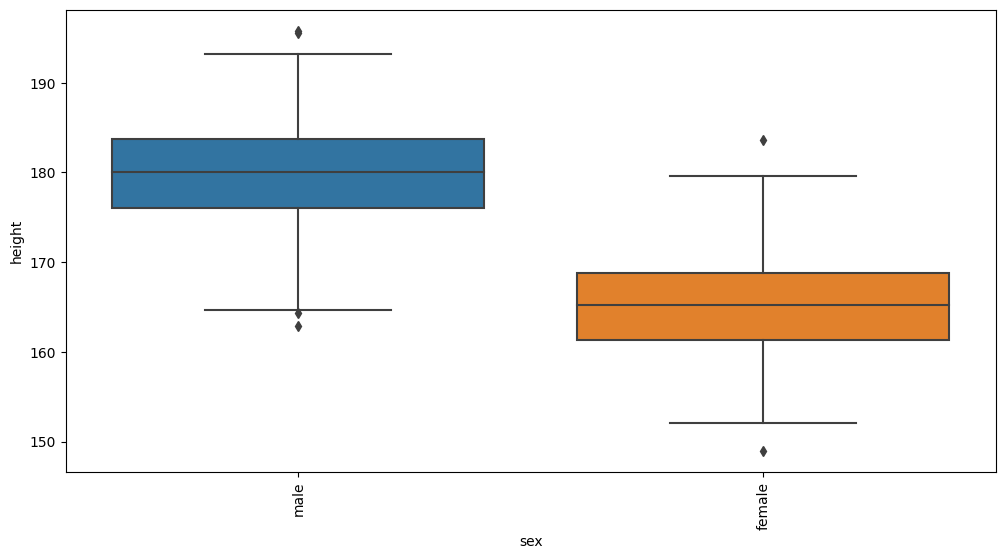

In [34]:
auto.target_analysis(
    train_data=df_train,
    label='height',
    fit_distributions=False
)

- 체중, 성별 모두 height와 유의미한 상관관계에 놓여있음.
- 남자가 여자보다 height에 더 큰 기여를 함.

###  변수해석 - 중요한 설명변수는?

No path specified. Models will be saved in: "AutogluonModels/ag-20231211_060740/"


### Model Prediction for height

Using validation data for `Test` points

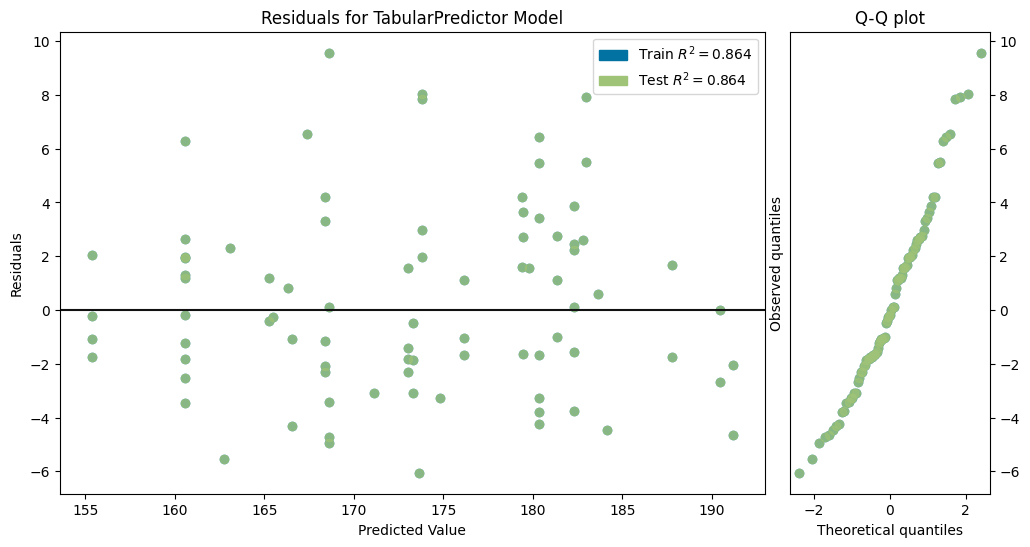

### Model Leaderboard

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT,-3.441217,-3.881789,0.036212,0.005053,0.868188,0.036212,0.005053,0.868188,1,True,1


### Feature Importance for Trained Model

,importance,stddev,p_value,n,p99_high,p99_low
weight,9.433162,0.468715,7.290537e-07,5,10.398253,8.468071
sex,1.710680,0.464422,5.924364e-04,5,2.666932,0.754427


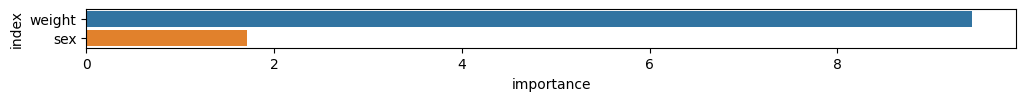

### Rows with the highest prediction error

Rows in this category worth inspecting for the causes of the error

,weight,sex,height,height_pred,error
208,NaN,female,159.027430,168.600342,9.572911
263,54.145913,female,165.791300,173.811340,8.020041
146,76.642564,male,175.011295,182.954391,7.943097
228,56.473758,female,165.962051,173.811340,7.849289
92,51.018586,female,160.851952,167.398270,6.546318
198,NaN,male,173.915293,180.355164,6.439870
157,46.214566,female,154.289882,160.576065,6.286183
106,69.667856,male,179.665916,173.611328,6.054588
118,48.711791,female,168.305739,162.763138,5.542602
166,77.068343,male,177.439194,182.954391,5.515197


In [35]:
auto.quick_fit(
    train_data=df_train,
    label='height',
    show_feature_importance_barplots=True
)

- 설명변수 weight가 sex보다 더 큰 중요성을 띔.
- 두 변수중 하나를 버리라면 sex 변수를 버리는게 합리적.

### 관측치별 해석

In [36]:
df_train.iloc[[0]]


,weight,sex,height
0,71.169041,male,180.906857


In [37]:
predictr.predict(df_train.iloc[[0]])


INFO:sklearnex: sklearn.neighbors.KNeighborsRegressor.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.neighbors.KNeighborsRegressor.predict: running accelerated version on CPU


0    178.678467
Name: height, dtype: float32

#### 모델은 왜 0번 row를 178.678로 예측했을까??

INFO:sklearnex: sklearn.neighbors.KNeighborsRegressor.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.neighbors.KNeighborsRegressor.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.neighbors.KNeighborsRegressor.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.neighbors.KNeighborsRegressor.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.neighbors.KNeighborsRegressor.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.neighbors.KNeighborsRegressor.predict: running accelerated version on CPU


,weight,sex,height
0,71.169041,male,180.906857


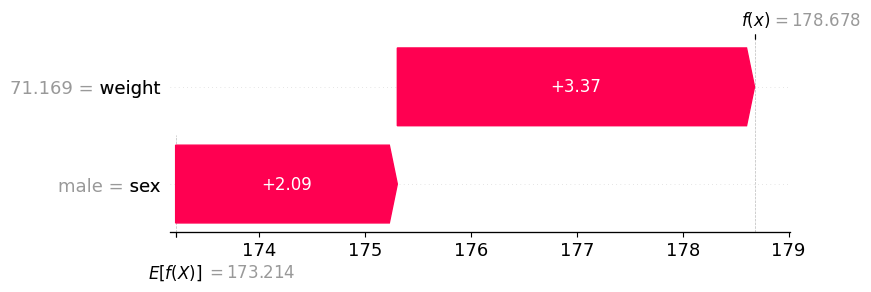

In [38]:
auto.explain_rows(
    train_data= df_train,
    model = predictr,
    rows = df_train.iloc[[0]],
    display_rows= True,
    plot='waterfall'
)

- 일단은 평균값인 173.115에 적합
- sex를 고려하여 +2.09
- weight를 고려하여 +3.37
- 최종적으로 178.678

## week13-4 아이스크림(type무의미)/자료분석

### Data

In [39]:
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/main/posts/mid/icesales_train.csv')

In [45]:
df_train.head()

,temp,type,sales
0,19.4,choco,64.807407
1,0.9,vanilla,25.656697
2,7.4,vanilla,34.756650
3,4.5,choco,27.265442
4,21.1,choco,70.606946


<AxesSubplot: xlabel='temp', ylabel='sales'>

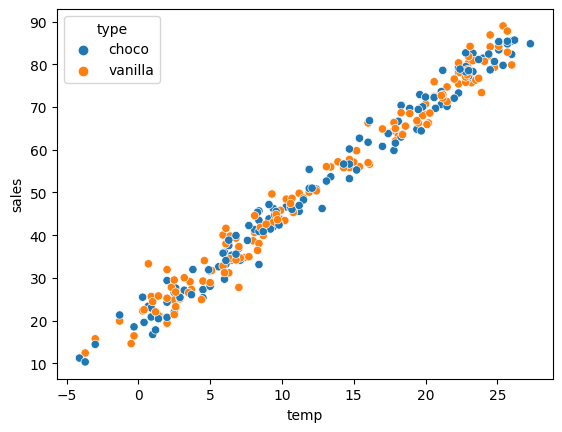

In [40]:
sns.scatterplot(df_train,x='temp',y='sales',hue='type')

### 적합

In [41]:
# step1 -- pass
# step2
predictr = TabularPredictor(label='sales')
# step3
predictr.fit(df_train)
# step4
yhat = predictr.predict(df_train)

No path specified. Models will be saved in: "AutogluonModels/ag-20231211_062103/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231211_062103/"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Dec 1 13:04:48 UTC 2023
Disk Space Avail:   20.91 GB / 20.96 GB (99.8%)
Train Data Rows:    280
Train Data Columns: 2
Label Column: sales
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (88.99437629756306, 10.335207096486446, 51.10189, 21.16757)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeat

[1000]	valid_set's rmse: 3.11194


	-3.0864	 = Validation score   (-root_mean_squared_error)
	0.35s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-2.9027	 = Validation score   (-root_mean_squared_error)
	0.79s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: CatBoost ...
	-2.7878	 = Validation score   (-root_mean_squared_error)
	0.5s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-2.88	 = Validation score   (-root_mean_squared_error)
	0.78s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-2.674	 = Validation score   (-root_mean_squared_error)
	2.32s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: XGBoost ...
		'Booster' object has no attribute 'best_ntree_limit'
Detailed Traceback:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 1733, in _train_and_save
    model = self._train_single(X, y

### 적합결과 시각화

<AxesSubplot: xlabel='temp', ylabel='sales'>

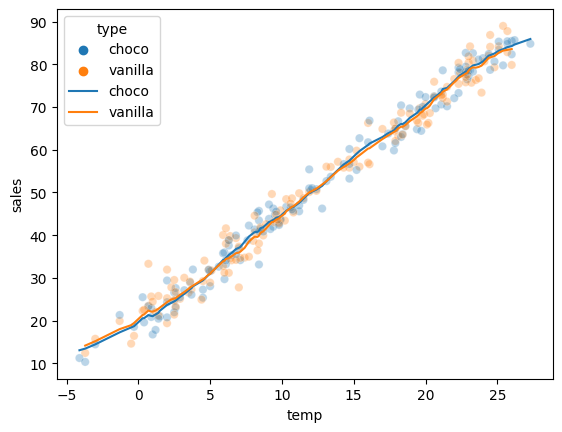

In [42]:
sns.scatterplot(df_train,x='temp',y='sales',hue='type',alpha=0.3)
sns.lineplot(df_train,x='temp',y=yhat,hue='type')

In [43]:
predictr.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-2.547987,0.092438,5.429597,0.000567,0.355752,2,True,11
1,NeuralNetTorch,-2.571534,0.006054,1.960287,0.006054,1.960287,1,True,9
2,NeuralNetFastAI,-2.673987,0.013198,2.316138,0.013198,2.316138,1,True,8
3,KNeighborsUnif,-2.761688,0.003943,0.009192,0.003943,0.009192,1,True,1
4,CatBoost,-2.787790,0.001848,0.499213,0.001848,0.499213,1,True,6
5,ExtraTreesMSE,-2.879997,0.068355,0.777735,0.068355,0.777735,1,True,7
6,RandomForestMSE,-2.902703,0.068676,0.788228,0.068676,0.788228,1,True,5
7,LightGBMLarge,-2.906174,0.002074,0.506624,0.002074,0.506624,1,True,10
8,LightGBM,-3.086423,0.002712,0.350610,0.002712,0.350610,1,True,4
9,LightGBMXT,-3.103597,0.003091,0.542382,0.003091,0.542382,1,True,3


### 적합결과 해석

## Target variable analysis

,count,mean,std,min,25%,50%,75%,max,dtypes,unique,missing_count,missing_ratio,raw_type,special_types
sales,280,51.101886,21.167573,10.335207,33.053077,47.844021,70.451589,88.994376,float64,280,,,float,


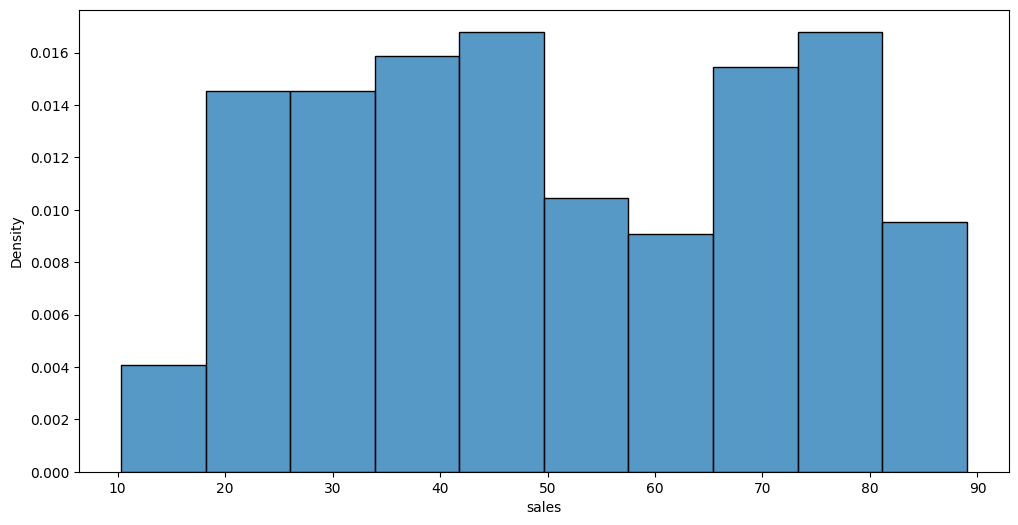

### Target variable correlations

**`train_data` - `spearman` correlation matrix; focus: absolute correlation for `sales` >= `0.5`**

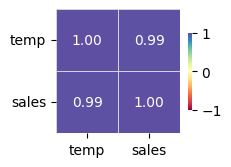

**Feature interaction between `temp`/`sales` in `train_data`**

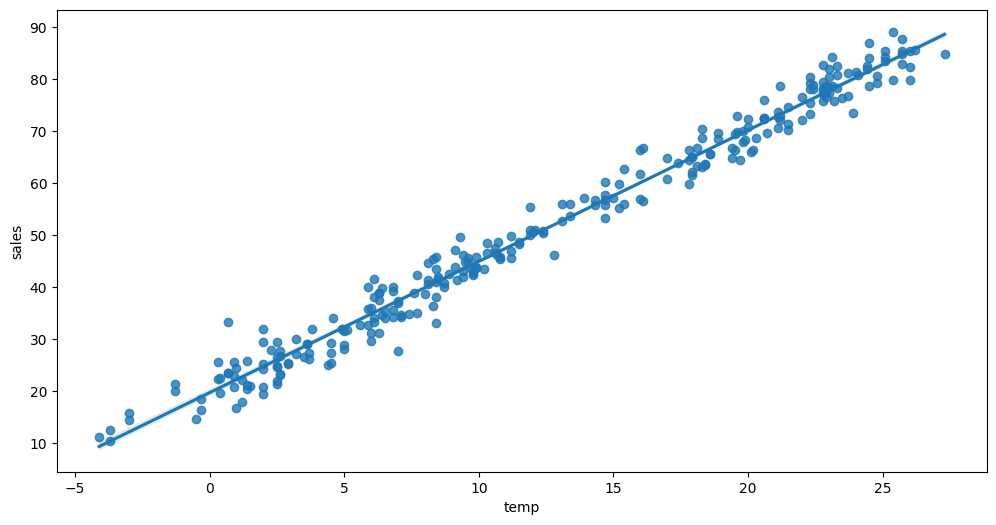

In [44]:
auto.target_analysis(
    train_data=df_train,
    label='sales',
    fit_distributions=False
)

- 유의미한 설명변수는 temp로 유일함.
- 설명변수 type은 무의미함.

###  변수해석 - 중요한 설명변수는?

No path specified. Models will be saved in: "AutogluonModels/ag-20231211_062420/"


### Model Prediction for sales

Using validation data for `Test` points

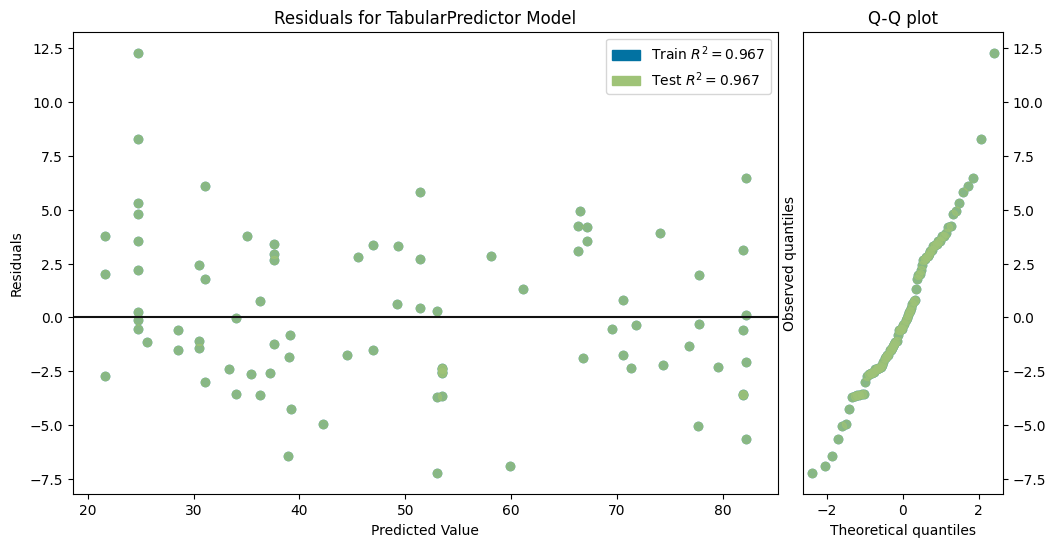

### Model Leaderboard

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT,-3.549018,-4.206044,0.010672,0.00243,0.613813,0.010672,0.00243,0.613813,1,True,1


### Feature Importance for Trained Model

,importance,stddev,p_value,n,p99_high,p99_low
temp,25.164809,1.617020,0.000002,5,28.494276,21.835342
type,-0.048470,0.059119,0.929654,5,0.073258,-0.170197


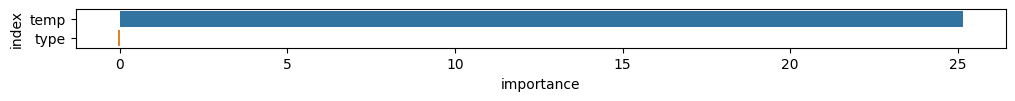

### Rows with the highest prediction error

Rows in this category worth inspecting for the causes of the error

,temp,type,sales,sales_pred,error
73,-3.7,vanilla,12.432354,24.724379,12.292025
191,-0.3,vanilla,16.436525,24.724379,8.287854
218,14.7,choco,60.178468,52.961044,7.217424
166,16.1,choco,66.821367,59.932861,6.888506
5,23.2,vanilla,75.697957,82.155197,6.457240
118,8.3,choco,45.364110,38.923119,6.440991
198,4.4,vanilla,24.924572,31.039103,6.114530
7,11.2,choco,45.593168,51.416027,5.822859
89,25.7,vanilla,87.788320,82.155197,5.633123
109,2.0,vanilla,19.398204,24.724379,5.326174


In [46]:
auto.quick_fit(
    train_data=df_train,
    label='sales',
    show_feature_importance_barplots=True
)

### 관측치별 해석

INFO:sklearnex: sklearn.neighbors.KNeighborsRegressor.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.neighbors.KNeighborsRegressor.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.neighbors.KNeighborsRegressor.predict: running accelerated version on CPU


,temp,type,sales
0,19.4,choco,64.807407


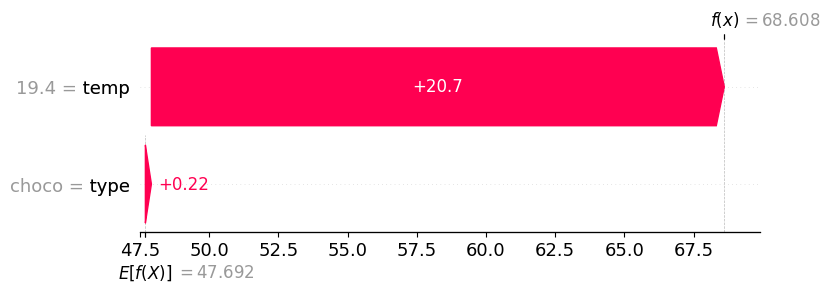

In [47]:
auto.explain_rows(
    train_data=df_train,
    model=predictr,
    rows=df_train.iloc[[0]],
    display_rows=True,
    plot='waterfall'
)   

- 일단은 평균값인 47.692에 적합
- 온도를 고려하여 +20.7
- type를 고려하여 +0.22
- 최종적으로 68.608

## week13-5 취업(오버피팅)

### Data

In [48]:
np.random.randn(43052)
n_balance = 10 
toeic = np.random.randint(0,199,size=5000)*5
gpa = np.random.randint(100,450,size=5000)/100
u = toeic * 8/995 + gpa * 10/4.5
u = u - np.mean(u)
v = np.exp(u)/(1+np.exp(u))
employment = np.random.binomial(n=1,p=v)
df = pd.DataFrame({
'toiec':toeic,
'gpa':gpa,
'employment':employment
})
df_balance = pd.DataFrame((np.random.randn(5000,n_balance)).reshape(5000,n_balance)*1,columns = ['balance'+str(i) for i in range(n_balance)]) > 0
df = pd.concat([df,df_balance],axis=1).assign(employment = lambda df: df.employment.map({0:'No',1:'Yes'}))
df_train, df_test = sklearn.model_selection.train_test_split(df, test_size=0.7, random_state=42)

In [49]:
df_train.head()


,toiec,gpa,employment,balance0,balance1,balance2,balance3,balance4,balance5,balance6,balance7,balance8,balance9
4431,825,1.93,No,False,True,True,False,True,True,False,True,True,True
2162,440,3.04,Yes,True,True,False,False,False,True,False,False,False,False
2396,80,2.55,No,False,True,True,True,False,True,True,True,True,True
4768,585,4.44,Yes,True,False,True,True,True,True,True,False,False,False
2271,125,3.54,Yes,True,True,True,True,False,False,False,True,False,False


### 적합

In [50]:
# step1 --pass
# step2
predictr = TabularPredictor(label='employment')
# step3
predictr.fit(df_train)
# step4
yhat = predictr.predict(df_train)

No path specified. Models will be saved in: "AutogluonModels/ag-20231211_062859/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231211_062859/"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Dec 1 13:04:48 UTC 2023
Disk Space Avail:   20.90 GB / 20.96 GB (99.7%)
Train Data Rows:    1500
Train Data Columns: 12
Label Column: employment
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  ['No', 'Yes']
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = Yes, class 0 = No
	Note: For your binary classification, AutoGluon arbitrarily selected which label-value represents positi

### 적합결과 해석

## Target variable analysis

,count,unique,top,freq,dtypes,missing_count,missing_ratio,raw_type,special_types
employment,1500,2,No,761,object,,,object,


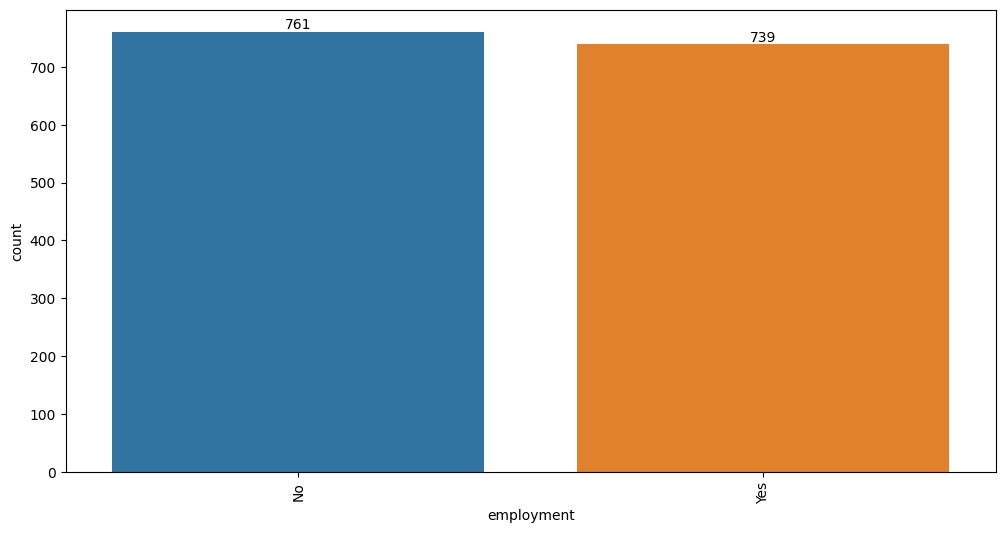

### Target variable correlations

**`train_data` - `spearman` correlation matrix; focus: absolute correlation for `employment` >= `0.5`**

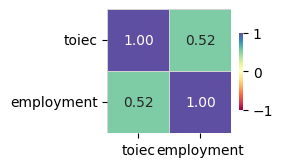

**Feature interaction between `toiec`/`employment` in `train_data`**

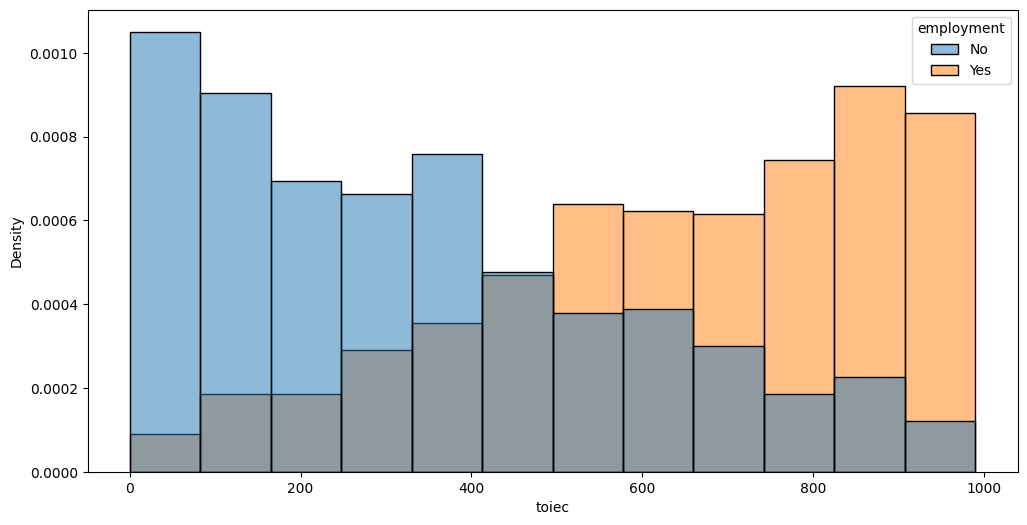

In [51]:
auto.target_analysis(
    train_data=df_train,
    label='employment',
    fit_distributions=False
)

###  변수해석 - 중요한 설명변수는?

No path specified. Models will be saved in: "AutogluonModels/ag-20231211_063024/"


### Model Prediction for employment

Using validation data for `Test` points

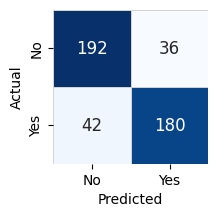

### Model Leaderboard

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT,0.826667,0.871429,0.005407,0.003691,0.903589,0.005407,0.003691,0.903589,1,True,1


### Feature Importance for Trained Model

,importance,stddev,p_value,n,p99_high,p99_low
toiec,0.196000,0.023275,0.000023,5,0.243924,0.148076
gpa,0.161333,0.017399,0.000016,5,0.197158,0.125509
balance4,0.003556,0.003370,0.038871,5,0.010495,-0.003384
balance2,0.001778,0.006166,0.277129,5,0.014475,-0.010919
balance9,0.001778,0.004818,0.227830,5,0.011697,-0.008142
balance8,-0.001333,0.006777,0.658647,5,0.012620,-0.015287
balance7,-0.001333,0.006206,0.671977,5,0.011446,-0.014112
balance0,-0.003556,0.005116,0.902431,5,0.006978,-0.014089
balance5,-0.005778,0.005116,0.967507,5,0.004756,-0.016312
balance6,-0.007556,0.004869,0.987209,5,0.002469,-0.017580


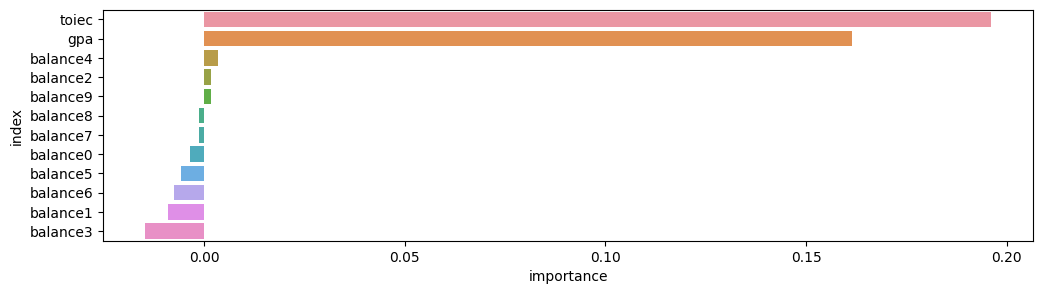

### Rows with the highest prediction error

Rows in this category worth inspecting for the causes of the error

,toiec,gpa,balance0,balance1,balance2,balance3,balance4,balance5,balance6,balance7,balance8,balance9,employment,No,Yes,error
559,95,2.53,False,False,True,True,False,True,False,True,True,False,Yes,0.918199,0.081801,0.836398
4351,285,2.96,True,False,False,False,False,True,True,False,True,False,Yes,0.858853,0.141147,0.717707
1383,575,1.61,True,False,True,False,False,False,True,True,False,False,Yes,0.847972,0.152028,0.695944
2263,440,3.37,True,False,False,True,False,True,False,True,False,True,No,0.161466,0.838534,0.677069
2385,955,2.16,False,True,False,False,False,True,True,True,False,True,No,0.183473,0.816527,0.633054
520,625,1.42,True,False,True,False,False,True,True,True,True,False,Yes,0.807390,0.192610,0.614779
3419,120,3.53,True,False,True,False,True,True,False,False,True,False,Yes,0.801122,0.198878,0.602244
2641,800,1.24,True,False,True,False,False,True,False,True,False,False,Yes,0.798398,0.201602,0.596796
3208,410,2.33,True,False,False,True,True,False,False,False,True,False,Yes,0.789314,0.210686,0.578628
723,820,1.31,True,False,True,True,False,False,True,False,False,False,Yes,0.789125,0.210875,0.578250


### Rows with the least distance vs other class

Rows in this category are the closest to the decision boundary vs the other class and are good candidates for additional labeling

,toiec,gpa,balance0,balance1,balance2,balance3,balance4,balance5,balance6,balance7,balance8,balance9,employment,No,Yes,error
215,300,3.18,False,True,True,True,True,True,False,False,True,False,No,0.496866,0.503134,0.006269
2624,880,1.95,True,False,False,False,True,False,False,False,True,False,Yes,0.504570,0.495430,0.009140
2774,560,2.73,True,True,False,False,False,False,False,False,True,False,No,0.490084,0.509916,0.019832
3242,985,2.29,True,True,True,True,False,True,True,True,False,False,Yes,0.512176,0.487824,0.024353
2891,110,4.09,False,True,False,False,False,False,True,False,False,True,Yes,0.514079,0.485921,0.028157
2768,710,1.93,True,True,True,True,False,False,True,False,True,False,Yes,0.516013,0.483987,0.032025
784,215,3.97,False,False,True,False,False,True,False,False,False,False,No,0.480595,0.519405,0.038810
4298,140,3.89,True,False,False,True,False,True,False,False,True,True,No,0.472319,0.527681,0.055362
3890,535,2.46,True,True,True,False,True,True,False,False,False,True,Yes,0.528535,0.471465,0.057071
946,485,2.60,False,True,True,False,True,True,True,False,True,True,No,0.470184,0.529816,0.059632


In [52]:
auto.quick_fit(
    train_data= df_train,
    label = 'employment',
    show_feature_importance_barplots=True
)

### 관측치별 해석

In [53]:
df_train.iloc[[0]]

,toiec,gpa,employment,balance0,balance1,balance2,balance3,balance4,balance5,balance6,balance7,balance8,balance9
4431,825,1.93,No,False,True,True,False,True,True,False,True,True,True


In [54]:
predictr.predict(df_train.iloc[[0]])

4431    Yes
Name: employment, dtype: object

,toiec,gpa,employment,balance0,balance1,balance2,balance3,balance4,balance5,balance6,balance7,balance8,balance9
4431,825,1.93,No,0,1,1,0,1,1,0,1,1,1


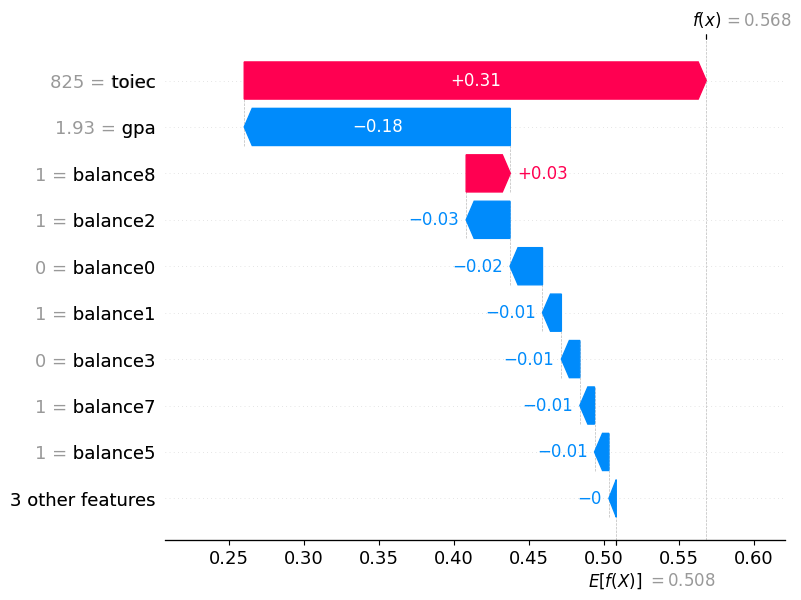

In [55]:
auto.explain_rows(
    train_data=df_train,
    model=predictr,
    rows=df_train.iloc[[0]]*1,
    display_rows=True,
    plot='waterfall'
)

- 일단 평균값인 0.508로 적합
- toiec은 825점이니까 꽤 높아. 결론적으로 +0.31
- gpa는 1.93점으로 낮은편이야. 결론적으로 -0.18
- balance8에서 +0.03
...
- 최종적으로 employment = 0.568로 취업성공이라고 예측함.

## week13-6 취업(다중공선성)/자료분석

### Data

In [56]:
np.random.seed(43052)
df_train = pd.read_csv("https://raw.githubusercontent.com/guebin/MP2023/main/posts/employment_multicollinearity.csv")
df_train['employment_score'] = df_train.gpa * 1.0 + df_train.toeic* 1/100 + np.random.randn(500)
df_train = df_train.iloc[:,:8]
df_train

,employment_score,gpa,toeic,toeic0,toeic1,toeic2,toeic3,toeic4
0,1.784955,0.051535,135,129.566309,133.078481,121.678398,113.457366,133.564200
1,10.789671,0.355496,935,940.563187,935.723570,939.190519,938.995672,945.376482
2,8.221213,2.228435,485,493.671390,493.909118,475.500970,480.363752,478.868942
3,2.137594,1.179701,65,62.272565,55.957257,68.521468,76.866765,51.436321
4,8.650144,3.962356,445,449.280637,438.895582,433.598274,444.081141,437.005100
...,...,...,...,...,...,...,...,...
495,9.057243,4.288465,280,276.680902,274.502675,277.868536,292.283300,277.476630
496,4.108020,2.601212,310,296.940263,301.545000,306.725610,314.811407,311.935810
497,2.430590,0.042323,225,206.793217,228.335345,222.115146,216.479498,227.469560
498,5.343171,1.041416,320,327.461442,323.019899,329.589337,313.312233,315.645050


### 적합

In [57]:
# step1 --pass
# step2
predictr = TabularPredictor(label='employment_score')
# step3
predictr.fit(df_train)
# step4
yhat = predictr.predict(df_train)

No path specified. Models will be saved in: "AutogluonModels/ag-20231211_064237/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231211_064237/"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Dec 1 13:04:48 UTC 2023
Disk Space Avail:   20.84 GB / 20.96 GB (99.4%)
Train Data Rows:    500
Train Data Columns: 7
Label Column: employment_score
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (15.12090627137731, -0.6447161480491369, 7.2271, 3.11598)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPip

### 적합결과 해석 

## Target variable analysis

,count,mean,std,min,25%,50%,75%,max,dtypes,unique,missing_count,missing_ratio,raw_type,special_types
employment_score,500,7.227104,3.115979,-0.644716,4.695513,7.281178,9.548811,15.120906,float64,500,,,float,


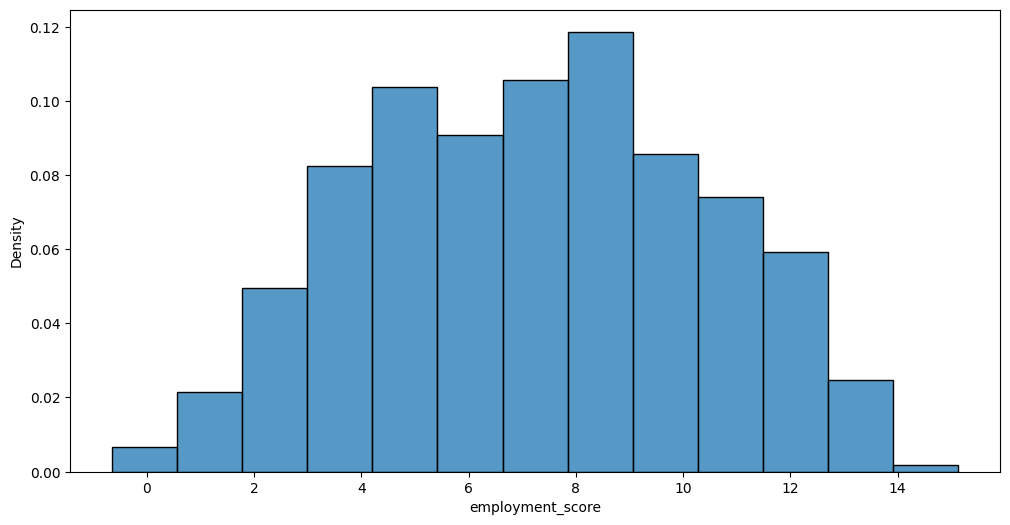

### Target variable correlations

**`train_data` - `spearman` correlation matrix; focus: absolute correlation for `employment_score` >= `0.5`**

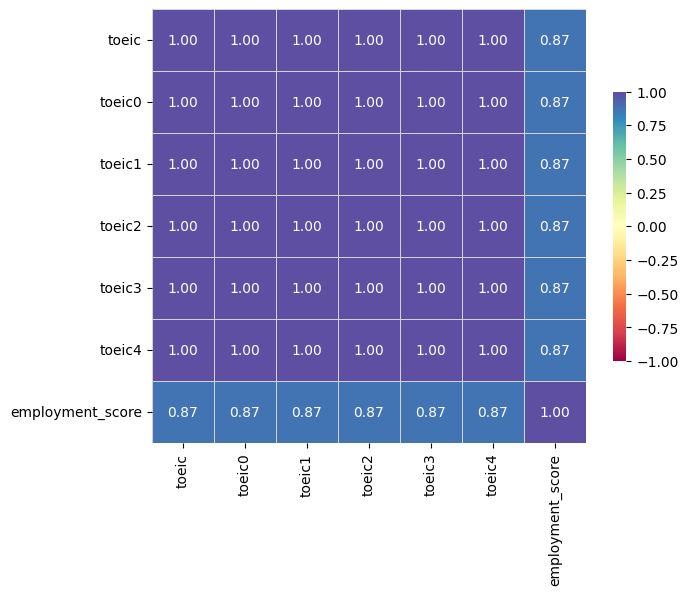

**Feature interaction between `toeic`/`employment_score` in `train_data`**

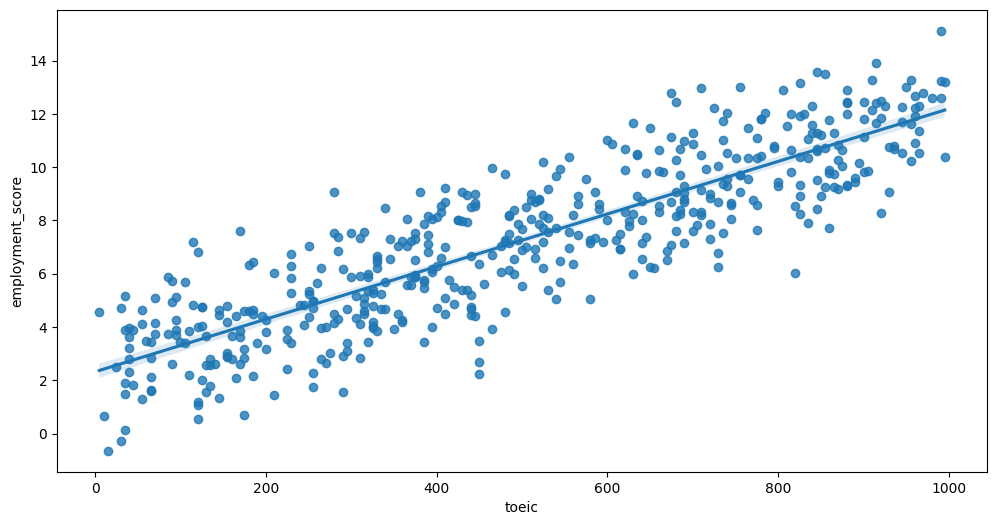

**Feature interaction between `toeic2`/`employment_score` in `train_data`**

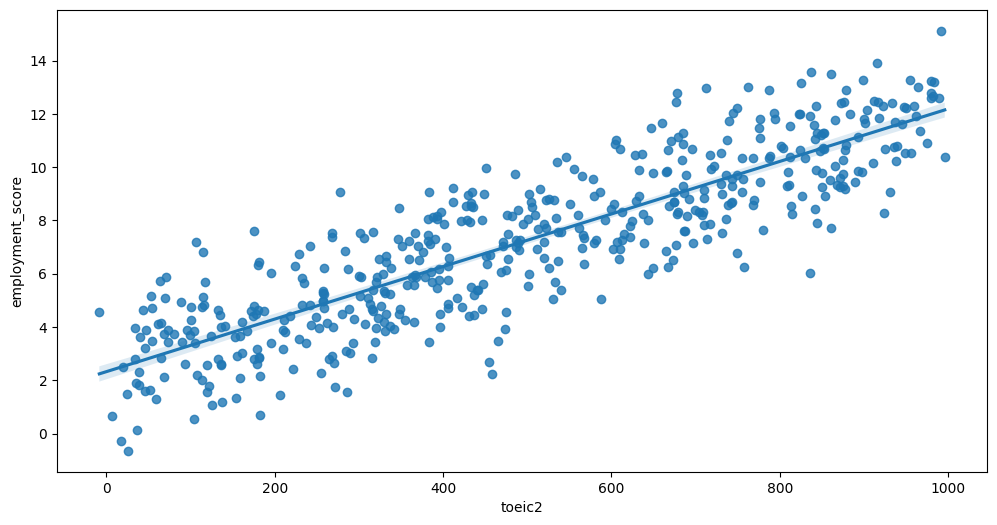

**Feature interaction between `toeic4`/`employment_score` in `train_data`**

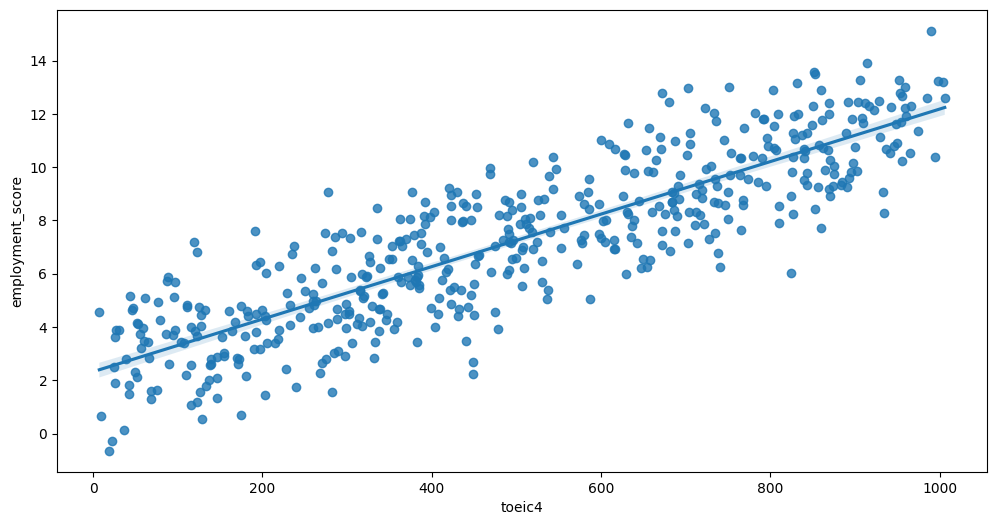

**Feature interaction between `toeic3`/`employment_score` in `train_data`**

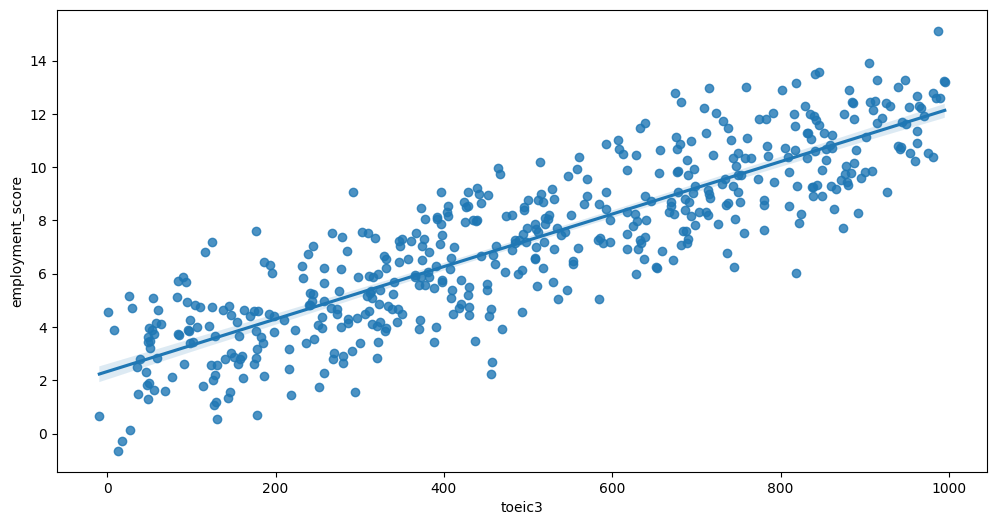

**Feature interaction between `toeic1`/`employment_score` in `train_data`**

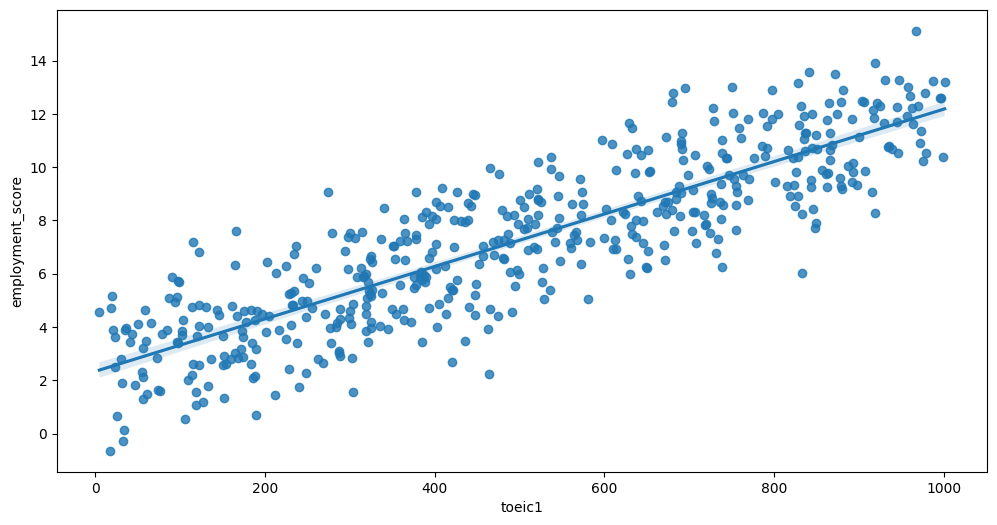

**Feature interaction between `toeic0`/`employment_score` in `train_data`**

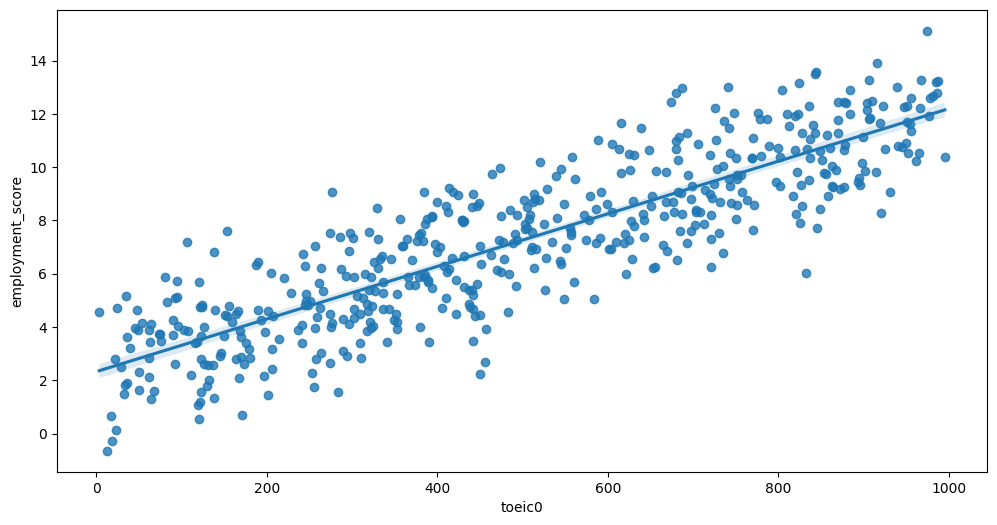

In [58]:
auto.target_analysis(
    train_data=df_train,
    label='employment_score',
    fit_distributions=False
)

- toeic, toeic0, toeic1, toeic2, toeic3, toeic4는 employment_score와 높은 상관관계를 갖고있다. 
- 각 설명변수끼리 correlation이 강력하므로 다중공선성 문제임.

### 변수해석 - 중요한 설명변수

No path specified. Models will be saved in: "AutogluonModels/ag-20231211_064553/"


### Model Prediction for employment_score

Using validation data for `Test` points

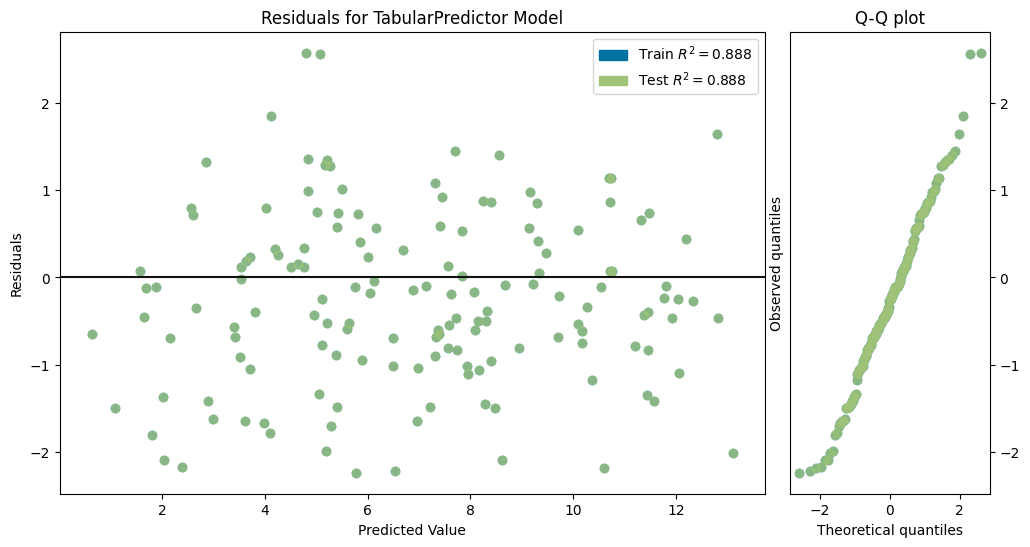

### Model Leaderboard

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT,-1.012202,-0.979194,0.007098,0.002595,0.842556,0.007098,0.002595,0.842556,1,True,1


### Feature Importance for Trained Model

,importance,stddev,p_value,n,p99_high,p99_low
gpa,1.020679,0.095581,0.000009,5,1.217483,0.823876
toeic0,0.266908,0.043618,0.000083,5,0.356718,0.177098
toeic2,0.252605,0.038863,0.000065,5,0.332626,0.172585
toeic,0.241941,0.043093,0.000116,5,0.330669,0.153212
toeic3,0.161979,0.035012,0.000246,5,0.234070,0.089888
toeic1,0.158796,0.040579,0.000470,5,0.242350,0.075242
toeic4,0.136791,0.037064,0.000588,5,0.213106,0.060476


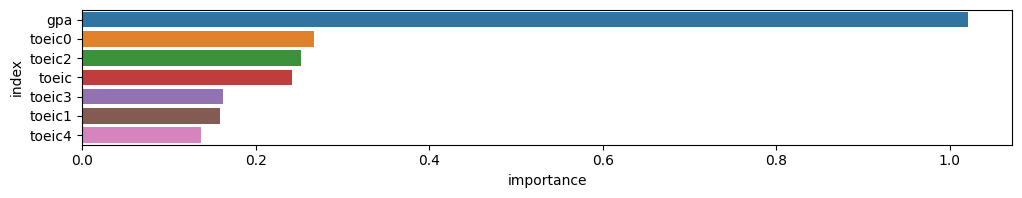

### Rows with the highest prediction error

Rows in this category worth inspecting for the causes of the error

,gpa,toeic,toeic0,toeic1,toeic2,toeic3,toeic4,employment_score,employment_score_pred,error
55,0.200267,450,450.310311,464.340472,458.213429,456.215452,448.932120,2.234912,4.809618,2.574706
8,4.191552,25,29.000939,22.725391,19.529454,35.896321,24.151228,2.514707,5.069639,2.554931
491,1.754276,425,428.686989,439.377437,446.630603,439.109681,423.056878,8.008441,5.771637,2.236804
144,2.013480,520,519.674312,521.390587,531.847782,511.375625,525.305439,8.755093,6.543661,2.211432
118,3.585276,675,679.425199,680.429579,677.878530,674.812300,672.177564,12.785551,10.599931,2.185620
469,1.969145,5,3.785864,4.575646,-8.358037,1.071854,7.253616,4.552622,2.385054,2.167567
403,1.678080,70,53.993037,65.691879,65.135837,58.510651,51.307683,4.136691,2.040128,2.096563
75,0.564461,795,799.270794,791.212118,803.426181,805.178974,803.979166,10.702375,8.615296,2.087079
293,4.364023,990,973.878219,966.687506,991.332887,987.137768,989.321286,15.120906,13.106976,2.013931
137,4.248511,115,106.422018,114.653052,106.830406,124.361062,118.754414,7.183716,5.199379,1.984337


In [59]:
auto.quick_fit(
    train_data=df_train,
    label='employment_score',
    show_feature_importance_barplots=True
)

- gpa 변수가 가장 중요한 설명변수임.
- 그다음으로 toeic0,2 순서로 중요함.

### 관측치별 해석

In [60]:
predictr.predict(df_train.iloc[[0]])

INFO:sklearnex: sklearn.neighbors.KNeighborsRegressor.predict: running accelerated version on CPU


0    1.91076
Name: employment_score, dtype: float32

INFO:sklearnex: sklearn.neighbors.KNeighborsRegressor.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.neighbors.KNeighborsRegressor.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.neighbors.KNeighborsRegressor.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


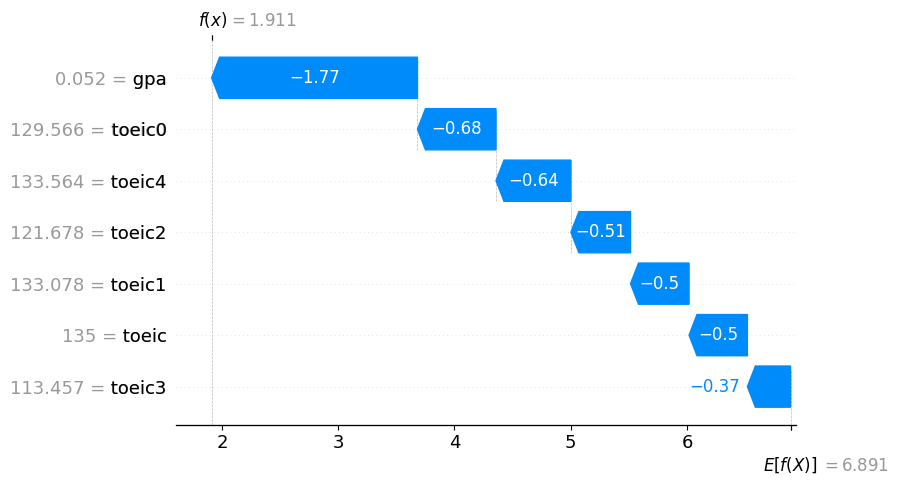

In [61]:
auto.explain_rows(
    train_data=df_train,
    model= predictr,
    rows= df_train.iloc[[0]],
    display_rows = False,
    plot='waterfall')

- 먼저 모델이 6.891로 적합됨. 
- 학점이 0.052라서 -1.77 
- 토익이 129.566이라서 -0.68임
- 결과적으로 1.911로 수렴함.

# 교호작용과 다중공선성
교호작용이 존재하는 데이터는 성별과 체중의 조합에 따라 키가 다르게 예측된다는 것을 의미한다. 
따라서 각 성별에 대해 체중에 따른 키를 예측하는 2개의 모델을 만드는 것이 합리적이다. 

다중공선성이 존재하는 데이터는 상관관계가 높은 변수중 하나를 drop하고 나머지 변수들로만 모델을 만드는 것이 합리적이다.